## Import

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns

from CinePred.data.data import *

In [123]:
print('----- init Data -----')
data = Data('../raw_data/IMDb movies.csv')

print('----- import Data -----')
data.import_data()
data.dataframe

print('----- keep columns -----')
data.keep_columns(columns_names=[
    'imdb_title_id', 'title', 'year', 'date_published', 'genre',
    'duration', 'country', 'director', 'writer', 'production_company',
    'actors', 'budget', 'worlwide_gross_income'
])

print('----- remove na rows -----')
data.remove_na_rows()

print('----- convert budget -----')
data.convert_budget_column(column_name='budget',min_rows=45, out_currency='USD')

print('----- convert income column -----')
data.convert_income(column_name='worlwide_gross_income')

print('----- convert to int -----')
data.convert_to_int('year')
data.convert_to_int('duration')

print('----- convert to date -----')
data.convert_to_date('date_published')

print('----- seasonality Sin/Cos -----')
data.add_sin_cos_features('Month_published')

print('----- reset index -----')
data.reset_index()

print('----- data_shape -----')
print(data.dataframe.shape)

print('----- add_prod_company_category -----')
data.add_prod_company_category("production_company", "production_weight")



----- init Data -----
----- import Data -----
----- keep columns -----
----- remove na rows -----
----- convert budget -----
----- convert income column -----
----- convert to int -----
----- convert to date -----
----- seasonality Sin/Cos -----
----- reset index -----
----- data_shape -----
(12024, 16)
----- add_prod_company_category -----


In [124]:
data.dataframe.columns

Index(['imdb_title_id', 'title', 'year', 'date_published', 'genre', 'duration',
       'country', 'director', 'writer', 'production_company', 'actors',
       'budget', 'worlwide_gross_income', 'Month_published', 'sin_MoPub',
       'cos_MoPub', 'production_weight'],
      dtype='object')

In [125]:
data.dataframe.sample(10)

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income,Month_published,sin_MoPub,cos_MoPub,production_weight
524,tt0080377,Fai come ti pare,1980,1980-12-17,"Action, Comedy",116,USA,Buddy Van Horn,"Stanford Sherman, Jeremy Joe Kronsberg",The Malpaso Company,"Clint Eastwood, Sondra Locke, Geoffrey Lewis, ...",1.500000e+07,70687344,12,-2.449294e-16,1.000000e+00,3
10899,tt4675030,Great Grand Masti,2016,2016-07-15,"Comedy, Drama, Fantasy",134,India,Indra Kumar,"Tushar Hiranandani, Akash Kaushik",ALT Entertainment,"Urvashi Rautela, Riteish Deshmukh, Vivek Obero...",3.975771e+05,21567,7,-5.000000e-01,-8.660254e-01,2
9953,tt2820852,Fast & Furious 7,2015,2015-04-02,"Action, Adventure, Thriller",137,"USA, China, Japan, Canada, United Arab Emirates",James Wan,"Chris Morgan, Gary Scott Thompson",Universal Pictures,"Vin Diesel, Paul Walker, Jason Statham, Michel...",1.900000e+08,1515048151,4,8.660254e-01,-5.000000e-01,5
2693,tt0120646,In fondo al cuore,1999,1999-04-02,Drama,106,USA,Ulu Grosbard,"Jacquelyn Mitchard, Stephen Schiff",Columbia Pictures,"Michelle Pfeiffer, Treat Williams, Whoopi Gold...",3.800000e+07,28121100,4,8.660254e-01,-5.000000e-01,5
3014,tt0161023,In cerca d'amore,1999,2000-03-17,"Comedy, Drama",102,USA,Gavin O'Connor,"Angela Shelton, Gavin O'Connor",Spanky Pictures,"Janet McTeer, Kimberly J. Brown, Jay O. Sander...",3.120000e+05,1350248,3,1.000000e+00,6.123234e-17,1
9247,tt2099556,Antiviral,2012,2013-02-13,"Horror, Mystery, Sci-Fi",108,"Canada, France",Brandon Cronenberg,Brandon Cronenberg,Alliance,"Caleb Landry Jones, Sarah Gadon, Lisa Berry, D...",2.566475e+06,61808,2,8.660254e-01,5.000000e-01,2
9693,tt2403851,De Groeten van Mike!,2012,2012-12-12,Family,95,Netherlands,Maria Peters,"Mirjam Oomkes, Willemine van der Wiel",Shooting Star Filmcompany BV,"Maas Bronkhuyzen, Faas Wijn, Bracha van Doesbu...",1.666656e+06,2050192,12,-2.449294e-16,1.000000e+00,3
8049,tt1499302,"Filth to Ashes, Flesh to Dust",2011,2011-09-30,Horror,90,USA,Paul Morrell,Derrick Bishop,Jeoa Productions,"Meredith Laine, Linda Bella, Allison Ochmanek,...",1.000000e+05,202531,9,-1.000000e+00,-1.836970e-16,1
1917,tt0107606,La notte della verità,1993,1995-06-01,"Drama, Thriller",96,USA,Yves Simoneau,"Bernard Taylor, Barry Schneider",Miramax,"Jamie Lee Curtis, Peter Gallagher, Joanne Whal...",8.000000e+06,737548,6,1.224647e-16,-1.000000e+00,5
3589,tt0263265,Patto con il Diavolo,2003,2007-08-17,"Comedy, Drama, Fantasy",106,USA,Alec Baldwin,"Stephen Vincent Benet, Archibald Macleish",Yari Film Group (YFG),"Virl Andrick, Ray Aranha, Kaniel Arocho, Jorge...",3.500000e+07,686846,8,-8.660254e-01,-5.000000e-01,2


<AxesSubplot:xlabel='budget', ylabel='worlwide_gross_income'>

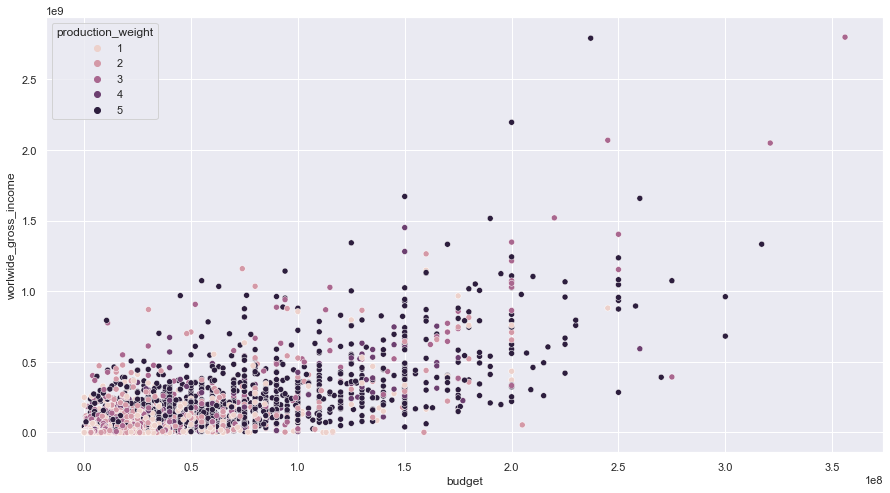

In [126]:
df = data.dataframe
sns.scatterplot(data = df, x='budget', y='worlwide_gross_income', hue='production_weight')

In [127]:
'imdb_title_id'
'title'
'year'
'date_published'
'genre'
'duration'
'country'
'director'
'writer'
'production_company'
'actors'
'budget'
'worlwide_gross_income'
    #'Month_published'
    #'sin_MoPub'
    #'cos_MoPub'
    #'production_weight'

'worlwide_gross_income'

<AxesSubplot:xlabel='index', ylabel='production_weight'>

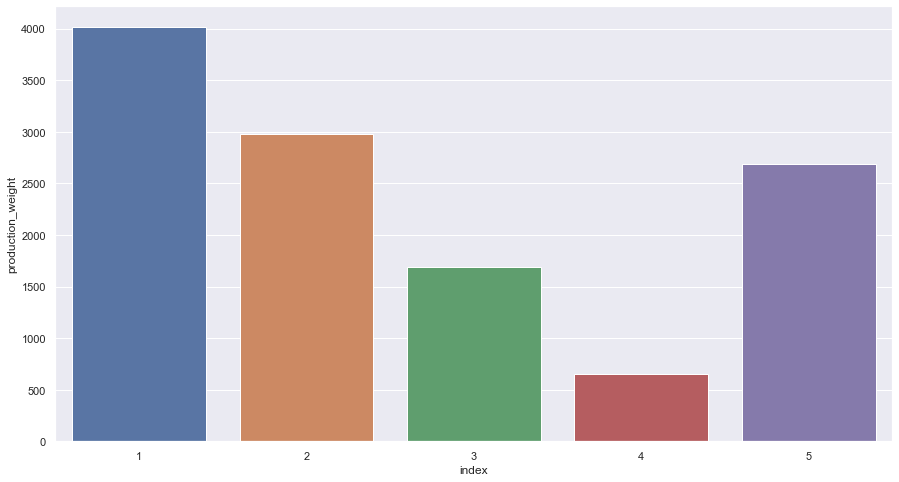

In [144]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})

column_to_plot = 'production_weight'
df_toplot = pd.DataFrame(df[column_to_plot].value_counts().reset_index())
sns.barplot(x=df_toplot['index'],y=df_toplot[column_to_plot])
#sns.histplot(df_toplot[column_to_plot])
#sns.histplot(data = np.log(df[column_to_plot])/np.log(10))

In [ ]:
prod = pd.cut(df[column_to_plot].value_counts(),
                      bins=[0, 2, 10, 50],
                      include_lowest=True,
                      labels=[1, 2, 3])
df['cat_director'] = df[column_to_plot].map(lambda x: prod[str(x)])

In [129]:
column_to_plot = 'cat_director'
df_toplot = pd.DataFrame(df[column_to_plot].value_counts().reset_index())
sns.barplot(x=df_toplot['index'],y=df_toplot[column_to_plot])
#sns.histplot(df_toplot[column_to_plot])

KeyError: 'cat_director'

In [130]:
sns.scatterplot(

SyntaxError: unexpected EOF while parsing (1584078231.py, line 1)